In [2]:
# pip install opencv-python==4.5.3.56
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [3]:
def show_img(_name, _img):
    cv2.imshow(_name, _img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [4]:
img = cv2.imread('dige.png')
show_img('', img)
up = cv2.pyrUp(img)
show_img('', up)
down = cv2.pyrDown(img)
show_img('', down)

In [5]:
img = cv2.imread('dige.png')
show_img('', img)
# 获取灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 设置阈值
_, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show_img('', thresh)

In [6]:
# 边缘检测
# 轮廓点 contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [7]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
show_img('', res)

In [13]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 3, (0, 0, 255), 2)
show_img('', res)

In [14]:
# 轮廓的应用
cnt = contours[0]
cv2.contourArea(cnt)

11.5

In [15]:
cv2.arcLength(cnt, True)

89.84061968326569

In [18]:
# 轮廓的近似
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 225), 2)
show_img('', res)

In [21]:
# 0.001的变化影响轮廓的精细程度
epsilon = 0.001 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show_img('', res)

In [35]:
# 外界矩形
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
print(len(contours))
# 轮廓
cnt = contours[0]

# 矩形轮廓
x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show_img('', img)

#外接圆形
(x, y), radius = cv2.minEnclosingCircle(cnt)
# 取整数便于观察
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
show_img('', img)

1


In [33]:
# 轮廓 / 外接矩形
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print("轮廓与边界矩形比：", extent)

轮廓与边界矩形比： 0.9171779335321417


In [92]:
# =======================================================================
# 模板匹配方法
# 模板方法匹配
# img = cv2.imread('part3.png', 0)
# template = cv2.imread('circle.png', 0)
template = cv2.imread('part4.png', 0)
img = cv2.imread('circle.png', 0)
h, w = template.shape[:2]

In [93]:
img.shape

(778, 882)

In [94]:
template.shape

(94, 126)

In [95]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [96]:
res = cv2.matchTemplate(img, template, 1)
res.shape

(685, 757)

In [97]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [98]:
print(min_val, max_val, min_loc, max_loc)

0.017995165660977364 1.0 (220, 139) (0, 0)


4


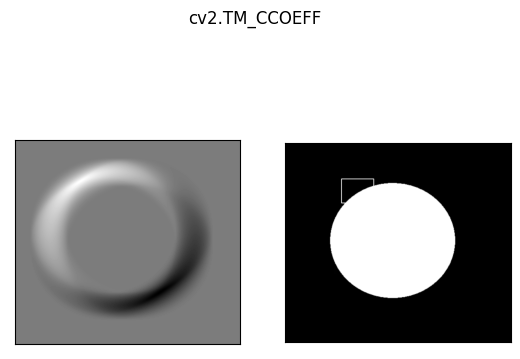

5


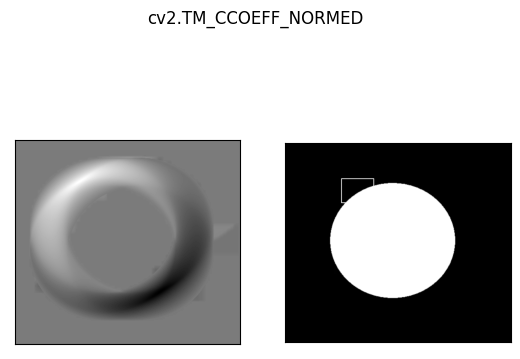

2


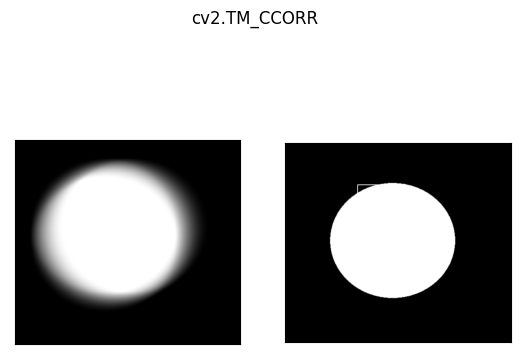

3


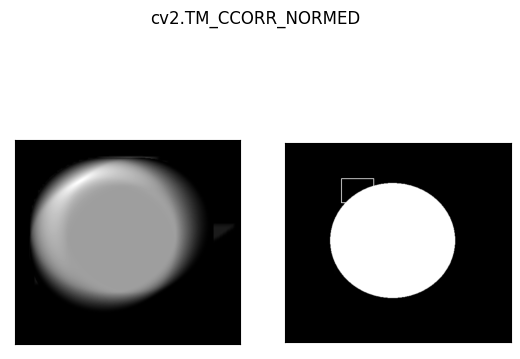

0


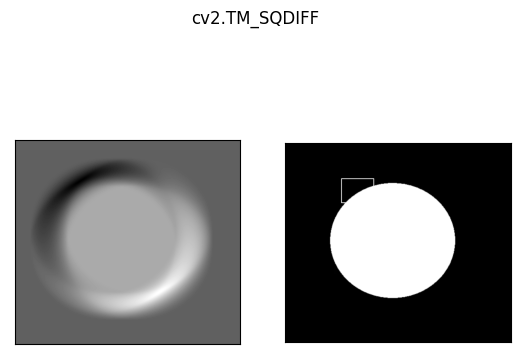

1


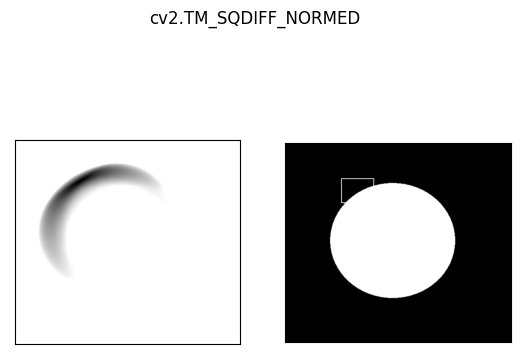

In [99]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [100]:
def show_img(_name, _img):
    cv2.imshow(_name, _img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [101]:
img = cv2.imread('dige.png')
show_img('', img)
up = cv2.pyrUp(img)
show_img('', up)
down = cv2.pyrDown(img)
show_img('', down)

In [102]:
img = cv2.imread('dige.png')
show_img('', img)
# 获取灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 设置阈值
_, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show_img('', thresh)

In [103]:
# 边缘检测
# 轮廓点 contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [104]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
show_img('', res)

In [105]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 3, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 轮廓的应用
cnt = contours[0]
cv2.contourArea(cnt)

In [ ]:
cv2.arcLength(cnt, True)

In [ ]:
# 轮廓的近似
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 225), 2)
show_img('', res)

In [ ]:
# 0.001的变化影响轮廓的精细程度
epsilon = 0.001 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 外界矩形
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
print(len(contours))
# 轮廓
cnt = contours[0]

# 矩形轮廓
x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show_img('', img)

#外接圆形
(x, y), radius = cv2.minEnclosingCircle(cnt)
# 取整数便于观察
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
show_img('', img)

In [ ]:
# 轮廓 / 外接矩形
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print("轮廓与边界矩形比：", extent)

In [ ]:
# =======================================================================
# 模板匹配方法
# 模板方法匹配
img = cv2.imread('part.png', 0)
template = cv2.imread('dige.png', 0)
h, w = template.shape[:2]

In [ ]:
img.shape

In [ ]:
template.shape

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
res = cv2.matchTemplate(img, template, 1)
res.shape

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
print(min_val, max_val, min_loc, max_loc)

In [ ]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template.method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()  #%%
# pip install opencv-python==4.5.3.56
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [ ]:
def show_img(_name, _img):
    cv2.imshow(_name, _img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
up = cv2.pyrUp(img)
show_img('', up)
down = cv2.pyrDown(img)
show_img('', down)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
# 获取灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 设置阈值
_, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show_img('', thresh)

In [ ]:
# 边缘检测
# 轮廓点 contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 3, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 轮廓的应用
cnt = contours[0]
cv2.contourArea(cnt)

In [ ]:
cv2.arcLength(cnt, True)

In [ ]:
# 轮廓的近似
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 225), 2)
show_img('', res)

In [ ]:
# 0.001的变化影响轮廓的精细程度
epsilon = 0.001 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 外界矩形
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
print(len(contours))
# 轮廓
cnt = contours[0]

# 矩形轮廓
x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show_img('', img)

#外接圆形
(x, y), radius = cv2.minEnclosingCircle(cnt)
# 取整数便于观察
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
show_img('', img)

In [ ]:
# 轮廓 / 外接矩形
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print("轮廓与边界矩形比：", extent)

In [ ]:
# =======================================================================
# 模板匹配方法
# 模板方法匹配
img = cv2.imread('part.png', 0)
template = cv2.imread('dige.png', 0)
h, w = template.shape[:2]

In [ ]:
img.shape

In [ ]:
template.shape

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
res = cv2.matchTemplate(img, template, 1)
res.shape

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
print(min_val, max_val, min_loc, max_loc)

In [ ]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template.method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()  #%%
# pip install opencv-python==4.5.3.56
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [ ]:
def show_img(_name, _img):
    cv2.imshow(_name, _img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
up = cv2.pyrUp(img)
show_img('', up)
down = cv2.pyrDown(img)
show_img('', down)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
# 获取灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 设置阈值
_, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show_img('', thresh)

In [ ]:
# 边缘检测
# 轮廓点 contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 3, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 轮廓的应用
cnt = contours[0]
cv2.contourArea(cnt)

In [ ]:
cv2.arcLength(cnt, True)

In [ ]:
# 轮廓的近似
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 225), 2)
show_img('', res)

In [ ]:
# 0.001的变化影响轮廓的精细程度
epsilon = 0.001 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 外界矩形
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
print(len(contours))
# 轮廓
cnt = contours[0]

# 矩形轮廓
x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show_img('', img)

#外接圆形
(x, y), radius = cv2.minEnclosingCircle(cnt)
# 取整数便于观察
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
show_img('', img)

In [ ]:
# 轮廓 / 外接矩形
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print("轮廓与边界矩形比：", extent)

In [ ]:
# =======================================================================
# 模板匹配方法
# 模板方法匹配
img = cv2.imread('part.png', 0)
template = cv2.imread('dige.png', 0)
h, w = template.shape[:2]

In [ ]:
img.shape

In [ ]:
template.shape

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
res = cv2.matchTemplate(img, template, 1)
res.shape

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
print(min_val, max_val, min_loc, max_loc)

In [ ]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template.method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()  #%%
# pip install opencv-python==4.5.3.56
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [ ]:
def show_img(_name, _img):
    cv2.imshow(_name, _img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
up = cv2.pyrUp(img)
show_img('', up)
down = cv2.pyrDown(img)
show_img('', down)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
# 获取灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 设置阈值
_, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show_img('', thresh)

In [ ]:
# 边缘检测
# 轮廓点 contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 3, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 轮廓的应用
cnt = contours[0]
cv2.contourArea(cnt)

In [ ]:
cv2.arcLength(cnt, True)

In [ ]:
# 轮廓的近似
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 225), 2)
show_img('', res)

In [ ]:
# 0.001的变化影响轮廓的精细程度
epsilon = 0.001 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 外界矩形
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
print(len(contours))
# 轮廓
cnt = contours[0]

# 矩形轮廓
x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show_img('', img)

#外接圆形
(x, y), radius = cv2.minEnclosingCircle(cnt)
# 取整数便于观察
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
show_img('', img)

In [ ]:
# 轮廓 / 外接矩形
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print("轮廓与边界矩形比：", extent)

In [ ]:
# =======================================================================
# 模板匹配方法
# 模板方法匹配
img = cv2.imread('part.png', 0)
template = cv2.imread('dige.png', 0)
h, w = template.shape[:2]

In [ ]:
img.shape

In [ ]:
template.shape

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
res = cv2.matchTemplate(img, template, 1)
res.shape

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
print(min_val, max_val, min_loc, max_loc)

In [ ]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template.method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()  #%%
# pip install opencv-python==4.5.3.56
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [ ]:
def show_img(_name, _img):
    cv2.imshow(_name, _img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
up = cv2.pyrUp(img)
show_img('', up)
down = cv2.pyrDown(img)
show_img('', down)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
# 获取灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 设置阈值
_, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show_img('', thresh)

In [ ]:
# 边缘检测
# 轮廓点 contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 3, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 轮廓的应用
cnt = contours[0]
cv2.contourArea(cnt)

In [ ]:
cv2.arcLength(cnt, True)

In [ ]:
# 轮廓的近似
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 225), 2)
show_img('', res)

In [ ]:
# 0.001的变化影响轮廓的精细程度
epsilon = 0.001 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 外界矩形
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
print(len(contours))
# 轮廓
cnt = contours[0]

# 矩形轮廓
x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show_img('', img)

#外接圆形
(x, y), radius = cv2.minEnclosingCircle(cnt)
# 取整数便于观察
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
show_img('', img)

In [ ]:
# 轮廓 / 外接矩形
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print("轮廓与边界矩形比：", extent)

In [ ]:
# =======================================================================
# 模板匹配方法
# 模板方法匹配
img = cv2.imread('part.png', 0)
template = cv2.imread('dige.png', 0)
h, w = template.shape[:2]

In [ ]:
img.shape

In [ ]:
template.shape

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
res = cv2.matchTemplate(img, template, 1)
res.shape

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
print(min_val, max_val, min_loc, max_loc)

In [ ]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template.method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()  #%%
# pip install opencv-python==4.5.3.56
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [ ]:
def show_img(_name, _img):
    cv2.imshow(_name, _img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
up = cv2.pyrUp(img)
show_img('', up)
down = cv2.pyrDown(img)
show_img('', down)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
# 获取灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 设置阈值
_, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show_img('', thresh)

In [ ]:
# 边缘检测
# 轮廓点 contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 3, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 轮廓的应用
cnt = contours[0]
cv2.contourArea(cnt)

In [ ]:
cv2.arcLength(cnt, True)

In [ ]:
# 轮廓的近似
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 225), 2)
show_img('', res)

In [ ]:
# 0.001的变化影响轮廓的精细程度
epsilon = 0.001 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 外界矩形
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
print(len(contours))
# 轮廓
cnt = contours[0]

# 矩形轮廓
x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show_img('', img)

#外接圆形
(x, y), radius = cv2.minEnclosingCircle(cnt)
# 取整数便于观察
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
show_img('', img)

In [ ]:
# 轮廓 / 外接矩形
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print("轮廓与边界矩形比：", extent)

In [ ]:
# =======================================================================
# 模板匹配方法
# 模板方法匹配
img = cv2.imread('part.png', 0)
template = cv2.imread('dige.png', 0)
h, w = template.shape[:2]

In [ ]:
img.shape

In [ ]:
template.shape

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
res = cv2.matchTemplate(img, template, 1)
res.shape

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
print(min_val, max_val, min_loc, max_loc)

In [ ]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template.method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()  #%%
# pip install opencv-python==4.5.3.56
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [ ]:
def show_img(_name, _img):
    cv2.imshow(_name, _img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
up = cv2.pyrUp(img)
show_img('', up)
down = cv2.pyrDown(img)
show_img('', down)

In [ ]:
img = cv2.imread('dige.png')
show_img('', img)
# 获取灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 设置阈值
_, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show_img('', thresh)

In [ ]:
# 边缘检测
# 轮廓点 contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 保持原图不变
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 3, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 轮廓的应用
cnt = contours[0]
cv2.contourArea(cnt)

In [ ]:
cv2.arcLength(cnt, True)

In [ ]:
# 轮廓的近似
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 225), 2)
show_img('', res)

In [ ]:
# 0.001的变化影响轮廓的精细程度
epsilon = 0.001 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show_img('', res)

In [ ]:
# 外界矩形
img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
print(len(contours))
# 轮廓
cnt = contours[0]

# 矩形轮廓
x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
show_img('', img)

#外接圆形
(x, y), radius = cv2.minEnclosingCircle(cnt)
# 取整数便于观察
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
show_img('', img)

In [ ]:
# 轮廓 / 外接矩形
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print("轮廓与边界矩形比：", extent)

In [ ]:
# =======================================================================
# 模板匹配方法
# 模板方法匹配
img = cv2.imread('part.png', 0)
template = cv2.imread('dige.png', 0)
h, w = template.shape[:2]

In [ ]:
img.shape

In [ ]:
template.shape

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
res = cv2.matchTemplate(img, template, 1)
res.shape

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
print(min_val, max_val, min_loc, max_loc)

In [ ]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template.method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.subplot(121), plt.imshow(res, cmap='gary')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
